### Import functions

In [100]:
import json
import os
import pandas as pd
import os
import glob
import pandas as pd
import time

### declare vars

In [101]:
root_dir = "/home/sam/Desktop/astar/TCGA_map"
os.chdir(root_dir)
f = open("./metadata.cart.2023-06-19.json")
metadata = json.load(f)[1]
fname = metadata["file_name"]
# Create gene maps for chosen gene extracted into separate csv files 
root_dir = '/home/sam/Desktop/astar/TCGA_map/tsvs'


# """
# vars needed: 

# base_dir = '/home/sam/Desktop/astar/TCGA_map'
# metadata = json.load(f)[0]
# fname = metadata["file_name"]


# """
print(metadata)


{'data_format': 'TSV', 'access': 'open', 'associated_entities': [{'entity_submitter_id': 'TCGA-DD-AADA-01A-11R-A41C-07', 'entity_type': 'aliquot', 'case_id': 'e50edba1-8ec4-47e7-a01e-9f1b2cd75fd7', 'entity_id': '392aa482-9a49-403c-817e-7b429e1d82f9'}], 'file_name': 'b89c4049-eeac-4f22-a9b6-18ffd9f07132.rna_seq.augmented_star_gene_counts.tsv', 'submitter_id': 'e12edb29-32d4-4dec-856e-93b8c5d636cb', 'data_category': 'Transcriptome Profiling', 'analysis': {'workflow_version': '5d8c131bbff59fb0c969217fc1d44e6d1503cd1f', 'input_files': [{'data_format': 'BAM', 'proportion_reads_mapped': 0.9616153802659285, 'total_reads': 127655218, 'access': 'controlled', 'file_name': 'b89c4049-eeac-4f22-a9b6-18ffd9f07132.rna_seq.genomic.gdc_realn.bam', 'proportion_base_mismatch': 0.002257156, 'proportion_reads_duplicated': 0, 'submitter_id': '46e0334d-3e76-4055-ae5f-015fbfb5012a', 'data_category': 'Sequencing Reads', 'platform': 'Illumina', 'file_size': 6255899162, 'created_datetime': '2021-12-13T17:38:18.6

### make copy of raw data and extract only important information (modular)

In [4]:




def open_tsv_skip_row(input_csv):
    """read a tsv file without the first row (index)"""
    output_csv = pd.read_csv(input_csv, delimiter = "\t", skiprows = [0], index_col= False)
    return output_csv

def create_tsv_gene(data_dir, output_dir, list_genes = ["ALB", "CD74"], list_counts= ["tpm_unstranded","unstranded"]):
    """save the gene counts from data_dir to output_dir, extracting only salient info based on list_genes and counts"""
    curr_dir = os.getcwd()
    list_counts = ["gene_name"] + list_counts
    os.chdir(data_dir)
    result = glob.glob('*/*.tsv' )
    for i in result:
        df = open_tsv_skip_row(os.path.join(data_dir, i)).reset_index(drop=True)
        gene_map = pd.Series(df.gene_id.values,index=df.gene_name).to_dict()
        gene_codes = [gene_map[gene] for gene in list_genes]
    #     gene_codes = ["ENSG00000000003.15"]
        df = df[df['gene_id'].isin(gene_codes)].reset_index(drop=True)
        df = df[list_counts]

        print(os.path.join(output_dir,os.path.basename(i)))
        df.to_csv(os.path.join(output_dir,os.path.basename(i)), sep="\t", index= None)
        print(df)
    os.chdir(curr_dir)


create_tsv_gene(root_dir, '/home/sam/Desktop/astar/TCGA_map/output_maps')




# genecode_map = {"ENSG00000163631.17": "ALB", "ENSG00000019582.15" : "CD74"}


    


/home/sam/Desktop/astar/TCGA_map/output_maps/1068220f-b2b3-4bd9-b120-83ca7697d2f5.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        704.4667       60361
1       ALB      26993.9951     1660183
/home/sam/Desktop/astar/TCGA_map/output_maps/c9432a6e-4d79-4de2-8ffa-e3b05129f78f.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        321.0225       44659
1       ALB      84366.7281     8424372
/home/sam/Desktop/astar/TCGA_map/output_maps/79c7fd6b-6178-4857-815f-84e0286cb439.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        813.5962       61958
1       ALB      72685.1444     3973077
/home/sam/Desktop/astar/TCGA_map/output_maps/8f9e712f-e4e8-44b2-96be-fa87b630428c.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74       1060.8205      104180
1       ALB      17908.7586     1262411
/home/sam/Desktop/astar/TCGA_map/out

/home/sam/Desktop/astar/TCGA_map/output_maps/4b5ffc48-de6c-4f22-92c8-8c41c821a37f.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        384.3147       46230
1       ALB      48503.6752     4187978
/home/sam/Desktop/astar/TCGA_map/output_maps/c74b62ad-52f4-4488-8628-ffc88df5d1bf.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        944.0841       88589
1       ALB      75306.0670     5072148
/home/sam/Desktop/astar/TCGA_map/output_maps/301b745d-b48e-4639-926f-1f9b6d42dc8e.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        155.0327       13730
1       ALB      32301.1957     2053329
/home/sam/Desktop/astar/TCGA_map/output_maps/ad4c870b-968c-4cd7-8270-cf2cd0ef94ee.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74         145.109       14062
1       ALB       52390.191     3644143
/home/sam/Desktop/astar/TCGA_map/out

/home/sam/Desktop/astar/TCGA_map/output_maps/cfa3467d-9796-4c34-b2ca-9cda7a5d20dc.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74       1057.5659       91418
1       ALB      88492.2803     5490634
/home/sam/Desktop/astar/TCGA_map/output_maps/70b45a47-52ad-40a1-97db-ef145353922e.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        446.5313       41786
1       ALB      27404.0407     1840714
/home/sam/Desktop/astar/TCGA_map/output_maps/3b4e1fdc-dcc1-4616-93b5-0f44bee5c64d.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        300.9496       38156
1       ALB      82831.9313     7538061
/home/sam/Desktop/astar/TCGA_map/output_maps/c0b92413-c9f7-4a67-9ca7-cb065ac9c407.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        623.0439       69966
1       ALB      91192.4231     7350552
/home/sam/Desktop/astar/TCGA_map/out

/home/sam/Desktop/astar/TCGA_map/output_maps/4af0c3f7-7742-448d-992a-8f4b7ad226b7.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        149.3777       12342
1       ALB      15301.5626      907462
/home/sam/Desktop/astar/TCGA_map/output_maps/28e28451-9c55-4f01-9ac1-fda75a6f828d.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        191.1131       18628
1       ALB     143025.0936    10006469
/home/sam/Desktop/astar/TCGA_map/output_maps/aa678196-590c-4fdd-beab-0a1a1942c5b0.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74       1645.0131      156150
1       ALB      23130.3215     1575967
/home/sam/Desktop/astar/TCGA_map/output_maps/ce954e33-e1ab-4def-b5ef-82c58a6f0806.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        386.3509       31964
1       ALB      30765.1752     1826970
/home/sam/Desktop/astar/TCGA_map/out

/home/sam/Desktop/astar/TCGA_map/output_maps/fe42792f-4116-4e5f-8db3-678b74cfd263.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        472.3457       46814
1       ALB       3032.3814      215721
/home/sam/Desktop/astar/TCGA_map/output_maps/ac057bd8-d7b3-49db-822d-6f07768f842c.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        109.2395       11202
1       ALB      38001.0246     2797075
/home/sam/Desktop/astar/TCGA_map/output_maps/151ff5a0-f236-4b98-a57f-d75dbde755ab.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        151.1875       39868
1       ALB      48956.3702     9266388
/home/sam/Desktop/astar/TCGA_map/output_maps/22b6bbde-8db5-4df5-bf7c-1a626851e3f5.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        577.5327       51366
1       ALB      89163.9364     5692214
/home/sam/Desktop/astar/TCGA_map/out

/home/sam/Desktop/astar/TCGA_map/output_maps/6ff7be81-1c7d-4a49-b5ab-3b1c171d4f87.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        615.0596       52826
1       ALB      24339.4897     1500496
/home/sam/Desktop/astar/TCGA_map/output_maps/71966926-f43b-4420-ae73-ec20cfd4e832.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        388.1007       30676
1       ALB      10563.6114      599321
/home/sam/Desktop/astar/TCGA_map/output_maps/974d3345-ad1d-49c6-a55d-bbe364b5a44e.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        670.3795       47572
1       ALB      31898.4404     1624774
/home/sam/Desktop/astar/TCGA_map/output_maps/36508e6f-d4aa-48e6-8b63-8d11d20c4098.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74       1501.8927      108498
1       ALB      25614.4798     1328193
/home/sam/Desktop/astar/TCGA_map/out

/home/sam/Desktop/astar/TCGA_map/output_maps/c6947e47-2ada-4c8d-830c-e6dbcb66769a.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        979.5207       56087
1       ALB      43103.5677     1771555
/home/sam/Desktop/astar/TCGA_map/output_maps/7b5d9241-4c32-4957-bfb5-d9bc4f711ee6.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        513.0843       65150
1       ALB       2475.0501      225581
/home/sam/Desktop/astar/TCGA_map/output_maps/07ba0ffd-9a39-498d-b289-a8896d1c3caf.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74         96.8727        5960
1       ALB      34409.9169     1519572
/home/sam/Desktop/astar/TCGA_map/output_maps/4c34db2e-e3cd-46d9-85ac-4277a1f036f1.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74       1130.7104       57269
1       ALB      17945.7758      652414
/home/sam/Desktop/astar/TCGA_map/out

/home/sam/Desktop/astar/TCGA_map/output_maps/c5ac862b-ef1c-4299-9afb-99d5f0e52fdc.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        786.8880       67207
1       ALB      78631.9592     4820516
/home/sam/Desktop/astar/TCGA_map/output_maps/eb81efb0-22be-40ad-93a7-1379c09169fb.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        466.3543       49671
1       ALB      66046.5979     5049289
/home/sam/Desktop/astar/TCGA_map/output_maps/7c1d65f0-c157-4502-a8ed-c88578d4eade.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        168.7721       17453
1       ALB      16119.3377     1196491
/home/sam/Desktop/astar/TCGA_map/output_maps/cb7b4121-6ee7-4e8f-8efc-6651bd5bdf3f.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        115.1278       10291
1       ALB      33527.8993     2151179
/home/sam/Desktop/astar/TCGA_map/out

/home/sam/Desktop/astar/TCGA_map/output_maps/3664c072-bf3f-42ac-9927-89b15993c72e.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74       1332.3112       58506
1       ALB      43215.3167     1362151
/home/sam/Desktop/astar/TCGA_map/output_maps/e615e629-be8c-4dce-a004-160e9d69b2db.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74       1082.8109       47755
1       ALB     100849.5616     3192516
/home/sam/Desktop/astar/TCGA_map/output_maps/d9c7fcac-4608-4952-8678-71e82b96b29c.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        932.6986       68130
1       ALB      49372.6547     2588668
/home/sam/Desktop/astar/TCGA_map/output_maps/f5092ee7-2656-4aa5-b0c3-884aadb9dbf8.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        327.1380       35340
1       ALB      21060.1658     1633015
/home/sam/Desktop/astar/TCGA_map/out

/home/sam/Desktop/astar/TCGA_map/output_maps/8be7d2b4-3bf5-49a5-97fb-97bdb5c29295.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74       3205.2173      194512
1       ALB      25441.4747     1108215
/home/sam/Desktop/astar/TCGA_map/output_maps/a877ebcc-8616-4dfd-b00b-bdd6f45d6371.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        232.1208       16310
1       ALB      51608.6806     2602888
/home/sam/Desktop/astar/TCGA_map/output_maps/6c8ba378-3d51-46a8-ac10-41652da21459.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74       1101.7742       87322
1       ALB      71073.5491     4043262
/home/sam/Desktop/astar/TCGA_map/output_maps/0ac55bd1-ee36-4795-b9d9-4a07495e5a46.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        392.9277       31799
1       ALB      91302.2857     5303655
/home/sam/Desktop/astar/TCGA_map/out

/home/sam/Desktop/astar/TCGA_map/output_maps/7f4dfecb-1ab7-411c-80cb-4613251b75a7.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74       1543.3087      184209
1       ALB      24084.0790     2063388
/home/sam/Desktop/astar/TCGA_map/output_maps/c4a1b18b-b240-4a20-b1b0-f0b77542373a.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        822.9330       40269
1       ALB      25667.1203      901522
/home/sam/Desktop/astar/TCGA_map/output_maps/cdd3341f-b11c-4b79-b1bc-fd0bc958983a.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        228.4940       22267
1       ALB      94921.3372     6639626
/home/sam/Desktop/astar/TCGA_map/output_maps/98062285-0c29-46a3-b955-2df64d7692ee.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74       2222.4585      197094
1       ALB       6007.7756      382425
/home/sam/Desktop/astar/TCGA_map/out

/home/sam/Desktop/astar/TCGA_map/output_maps/f9c05849-4905-4ded-82ff-0f83be46b772.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        449.0487       42508
1       ALB      28039.5285     1905201
/home/sam/Desktop/astar/TCGA_map/output_maps/286b5e5d-29d0-4033-9f0b-2ae0cb3fa397.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        427.8141       22507
1       ALB     140247.5842     5296034
/home/sam/Desktop/astar/TCGA_map/output_maps/8f7fc4d6-30f6-4361-94f3-48ef923cc9ec.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        111.2162        7798
1       ALB      39586.6999     1992311
/home/sam/Desktop/astar/TCGA_map/output_maps/4044408b-0b42-407b-9ea3-bab66dedb545.rna_seq.augmented_star_gene_counts.tsv
  gene_name  tpm_unstranded  unstranded
0      CD74        273.6689       34465
1       ALB     117072.9188    10582838
/home/sam/Desktop/astar/TCGA_map/out

In [9]:
sorted([3,1,2])

[1, 2, 3]

In [102]:
#Creates saved_list of with whitelist of names 

metadata_file = "./metadata.cart.2023-06-19.json"
data_dir = "/home/sam/Desktop/astar/TCGA_data"
# data_dir = "../TCGA_data"


# def get_fname_from 

def whitelist(metadata_file, data_dir):
    f = open(metadata_file)
    def flatten_list(my_list):
        if my_list == [] or my_list == ():
            return list(my_list)
        if isinstance(my_list[0], list):
            return flatten_list(my_list[0]) + flatten_list(my_list[1:])
        if isinstance(my_list[0], tuple):
            return flatten_list(my_list[0]) + flatten_list(my_list[1:])

        return list(my_list[:1]) + flatten_list(my_list[1:])

    output = list(os.walk(data_dir))
    dir_list = flatten_list(output)
    metadata = json.load(f)
#     saved_set = set()
    saved_list = []
    saved_fnames = []
    saved_list_fp = []
#     print(dir_list)
    for i in range(len(metadata)) :
        k = 1
        for j,inst in enumerate(dir_list):
            fname = metadata[i]["file_name"]
            if metadata[i]["associated_entities"][0]['entity_submitter_id'][:15] in inst:
                if inst.endswith("svs"):
                    saved_list.append(inst)
                    #create a filepath that can be easily saved
#                     saved_list_fp.append(os.path.join('.', dir_list[j-2][13:],inst))
                    while dir_list[j-k] == 'logs' or dir_list[j-k]=='annotations.txt':
                        k += 1
#                     saved_list_fp.append(os.path.join('.', dir_list[j-k][13:],inst))
                    saved_list_fp.append(os.path.join(dir_list[j-k],inst))
                    saved_fnames.append(fname)
    return saved_list, saved_fnames, dict(zip(saved_fnames, saved_list_fp))
    
saved_list, saved_fnames, saved_dict = whitelist(metadata_file, data_dir)                 
            
# len(saved_set)
print(len(saved_fnames))
print(len(saved_list))
print(saved_dict)
# print(saved_list)




373
373
{'cdb21b35-6884-40a4-b66d-2275eb5ca0a1.rna_seq.augmented_star_gene_counts.tsv': './fed99ca3-ea08-4f19-9c64-e9d8ff8f34ef/TCGA-DD-AACK-01Z-00-DX1.9B507BB8-18D5-419A-AEB4-5B71ECAECDAC.svs', 'b89c4049-eeac-4f22-a9b6-18ffd9f07132.rna_seq.augmented_star_gene_counts.tsv': './3127c2d2-4c7a-4eb1-994a-37f468d527e6/TCGA-DD-AADA-01Z-00-DX1.9008B43F-5955-44BB-9CDE-0294750C6F09.svs', 'd4db8178-db27-4b1c-8cf9-018420a91335.rna_seq.augmented_star_gene_counts.tsv': './7de15398-9ca2-4e4d-aadd-81c340329114/TCGA-DD-A3A5-01Z-00-DX1.F0D4C0AA-30C3-4954-9367-A63D9E68D2C9.svs', 'e6c37259-ade1-42e8-8087-88e04862218c.rna_seq.augmented_star_gene_counts.tsv': './553f70e1-d83d-4bc8-9cee-dac77068a458/TCGA-CC-A7IJ-01Z-00-DX1.525F3A40-46CC-4455-9473-F99BFA2D3572.svs', 'a582032e-2f32-48d5-a01c-fa21156c5a74.rna_seq.augmented_star_gene_counts.tsv': './210f7b37-7dce-4042-bcbd-131fd5ba7fec/TCGA-RC-A6M5-01Z-00-DX1.6CBFAFF7-54F5-4577-B7C3-93A72A24C0EA.svs', '47fc6e7f-fc2b-496d-b8d9-49a4b4cbc92d.rna_seq.augmented_star_

In [103]:
# find top and bottom vals

def find_extremes(saved_fnames, saved_list, saved_dict, data_dir,output_dir, list_genes = ["ALB", "CD74"], list_counts= ["tpm_unstranded","unstranded"], num_ext = 10):
    ALB_top_n, ALB_top_names = [],[]
    ALB_bot_n, ALB_bot_names = [],[]
    ALB_top_unnorm, ALB_bot_unnorm = [],[]
    CD74_top_n, CD74_top_names, = [],[]
    CD74_bot_n, CD74_bot_names = [],[]
    CD74_top_unnorm, CD74_bot_unnorm = [],[]
    
    
    for i,fname in enumerate(saved_fnames):
        #force filter out a blurry example
        if saved_list[i] == "TCGA-CC-A9FV-01Z-00-DX1.CAD4920E-4EE4-45C3-950C-DB2B8A824D28.svs":
            pass
        else:
            df = pd.read_csv(os.path.join(data_dir, fname), delimiter = "\t", index_col= False)
            print(df)
            for gene in list_genes:
                if gene == "ALB":
                    new_val = df.at[1,list_counts[0]]
                    no_norm_val = df.at[1,list_counts[1]]
                    print(new_val)
                    if len(ALB_top_n) < num_ext:
                        ALB_top_n.append(new_val)
                        ALB_top_names.append(fname)
                        ALB_top_unnorm.append(no_norm_val)

                    else:
                        zipped = zip(ALB_top_n,ALB_top_names)
                        zipped = sorted(zipped)
                        ALB_top_n = [x for x,y in zipped]
                        ALB_top_names = [y for x,y in zipped]   
                        count = 0 
                        if new_val> ALB_top_n[count]:
                            ALB_top_n.pop(count)
                            ALB_top_names.pop(count)
                            ALB_top_unnorm.pop(count)
                            ALB_top_n.append(new_val)
                            ALB_top_names.append(fname)
                            ALB_top_unnorm.append(no_norm_val)



                    if len(ALB_bot_n) < num_ext:
                        ALB_bot_n.append(new_val)
                        ALB_bot_names.append(fname)
                        ALB_bot_unnorm.append(no_norm_val)


                    else:
                        zipped = zip(ALB_bot_n, ALB_bot_names)
                        zipped = sorted(zipped)
                        ALB_bot_n = [x for x,y in zipped]
                        ALB_bot_names = [y for x,y in zipped]
                        count = num_ext - 1
                        if new_val< ALB_bot_n[count]:
                            ALB_bot_n.pop(count)
                            ALB_bot_names.pop(count)
                            ALB_bot_unnorm.pop(count)
                            ALB_bot_n.append(new_val)
                            ALB_bot_names.append(fname)
                            ALB_bot_unnorm.append(no_norm_val)

                else:
                    new_val = df.at[0,list_counts[0]]
                    no_norm_val = df.at[0,list_counts[1]]


                    if len(CD74_top_n) < num_ext:
                        CD74_top_n.append(new_val)
                        CD74_top_names.append(fname)
                        CD74_top_unnorm.append(no_norm_val)

                    else:
                        zipped = zip(CD74_top_n,CD74_top_names)
                        zipped = sorted(zipped)
                        CD74_top_n = [x for x,y in zipped]
                        CD74_top_names = [y for x,y in zipped] 
                        count = 0 
                        if new_val> CD74_top_n[count]:
                            CD74_top_n.pop(count)
                            CD74_top_names.pop(count)
                            CD74_top_unnorm.pop(count)
                            CD74_top_n.append(new_val)
                            CD74_top_names.append(fname)
                            CD74_top_unnorm.append(no_norm_val)


                    if len(CD74_bot_n) < num_ext:
                        CD74_bot_n.append(new_val)
                        CD74_bot_names.append(fname)
                        CD74_bot_unnorm.append(no_norm_val)


                    else:
                        zipped = zip(CD74_bot_n, CD74_bot_names)
                        zipped = sorted(zipped)
                        CD74_bot_n = [x for x,y in zipped]
                        CD74_bot_names = [y for x,y in zipped]
                        count = num_ext - 1
                        if new_val< CD74_bot_n[count]:
                            CD74_bot_n.pop(count)
                            CD74_bot_names.pop(count)
                            CD74_bot_unnorm.pop(count)
                            CD74_bot_n.append(new_val)
                            CD74_bot_names.append(fname)
                            CD74_bot_unnorm.append(no_norm_val)
                            
    ALB_top_fnames = [saved_dict[name] for name in ALB_top_names]
    ALB_bot_fnames = [saved_dict[name] for name in ALB_bot_names]
    CD74_top_fnames = [saved_dict[name] for name in CD74_top_names]
    CD74_bot_fnames = [saved_dict[name] for name in CD74_bot_names]
#         break
    print(ALB_top_n, ALB_top_names,ALB_bot_n, ALB_bot_names, CD74_top_n, CD74_top_names, CD74_bot_n, CD74_bot_names)
    extreme_dict = {"ALB_top_names": ALB_top_names,"ALB_top_fnames": ALB_top_fnames, "ALB_top_n": ALB_top_n, "ALB_top_unnorm":ALB_top_unnorm,
                    "ALB_bot_names": ALB_bot_names, "ALB_bot_fnames": ALB_bot_fnames, "ALB_bot_n": ALB_bot_n,"ALB_bot_unnorm":ALB_bot_unnorm, 
                    "CD74_top_names":CD74_top_names, "CD74_top_fnames": CD74_top_fnames, "CD74_top_n":CD74_top_n, "CD74_top_unnorm":CD74_top_unnorm, 
                    "CD74_bot_names": CD74_bot_names, "CD74_bot_fnames": CD74_bot_fnames, "CD74_bot_n": CD74_bot_n, "CD74_bot_unnorm":CD74_bot_unnorm}
    df = pd.DataFrame(extreme_dict)
    df.to_csv(os.path.join(output_dir, "selected_labels_filter.tsv"), sep = "\t", index=False)
    return extreme_dict



# print(create_tsv_genes("/home/sam/Desktop/astar/TCGA_map/tsvs/0bee0323-d4e5-4f61-97a3-d12e0d21c18d","hello"))


extremes_dict = find_extremes(saved_fnames, saved_list,saved_dict,'/home/sam/Desktop/astar/TCGA_map/output_maps', '/home/sam/Desktop/astar/TCGA_map')


  gene_name  tpm_unstranded  unstranded
0      CD74        339.0409       59599
1       ALB      51513.3256     6499789
51513.3256
  gene_name  tpm_unstranded  unstranded
0      CD74        326.8500       30769
1       ALB     113349.6528     7659102
113349.6528
  gene_name  tpm_unstranded  unstranded
0      CD74        478.4052       35462
1       ALB      12986.4634      690957
12986.4634
  gene_name  tpm_unstranded  unstranded
0      CD74       4825.6989      347211
1       ALB         24.4362        1262
24.4362
  gene_name  tpm_unstranded  unstranded
0      CD74        287.6764       33883
1       ALB      26892.5223     2273537
26892.5223
  gene_name  tpm_unstranded  unstranded
0      CD74        217.5182       18932
1       ALB      93193.1199     5822072
93193.1199
  gene_name  tpm_unstranded  unstranded
0      CD74       1079.1735       87923
1       ALB      44615.4230     2609090
44615.423
  gene_name  tpm_unstranded  unstranded
0      CD74       1052.7003      112370
1     

  gene_name  tpm_unstranded  unstranded
0      CD74        311.4449       24754
1       ALB     112476.1775     6416785
112476.1775
  gene_name  tpm_unstranded  unstranded
0      CD74       1062.0592      110938
1       ALB      15660.4661     1174165
15660.4661
  gene_name  tpm_unstranded  unstranded
0      CD74        958.9584       76632
1       ALB      18855.2957     1081525
18855.2957
  gene_name  tpm_unstranded  unstranded
0      CD74        179.6784       18024
1       ALB      53641.5964     3862334
53641.5964
  gene_name  tpm_unstranded  unstranded
0      CD74        133.2710        8135
1       ALB      19615.5928      859441
19615.5928
  gene_name  tpm_unstranded  unstranded
0      CD74        151.1875       39868
1       ALB      48956.3702     9266388
48956.3702
  gene_name  tpm_unstranded  unstranded
0      CD74        718.2317       64317
1       ALB      69994.2626     4499005
69994.2626
  gene_name  tpm_unstranded  unstranded
0      CD74        670.3795       47572
1 

  gene_name  tpm_unstranded  unstranded
0      CD74        411.9879       32058
1       ALB      30065.0424     1679216
30065.0424
  gene_name  tpm_unstranded  unstranded
0      CD74        572.1414       50027
1       ALB      87427.3003     5487076
87427.3003
  gene_name  tpm_unstranded  unstranded
0      CD74        786.9973       40219
1       ALB       3686.5129      135228
3686.5129
  gene_name  tpm_unstranded  unstranded
0      CD74        954.6977       76331
1       ALB      23582.8182     1353392
23582.8182
  gene_name  tpm_unstranded  unstranded
0      CD74        259.4138       17865
1       ALB      27575.5153     1363096
27575.5153
  gene_name  tpm_unstranded  unstranded
0      CD74        774.5569       84790
1       ALB      49006.0344     3850647
49006.0344
  gene_name  tpm_unstranded  unstranded
0      CD74        320.3425       30037
1       ALB      60688.6424     4084532
60688.6424
  gene_name  tpm_unstranded  unstranded
0      CD74        499.4035       45379
1   

In [86]:
# #Extract ALB specific pics 
# f = open("./metadata.cart.2023-06-19.json")
# def flatten_list(my_list):
#     if my_list == [] or my_list == ():
#         return list(my_list)
#     if isinstance(my_list[0], list):
#         return flatten_list(my_list[0]) + flatten_list(my_list[1:])
#     if isinstance(my_list[0], tuple):
#         return flatten_list(my_list[0]) + flatten_list(my_list[1:])

#     return list(my_list[:1]) + flatten_list(my_list[1:])
# # func = lambda L: '\t'.join([f(x) if type(x) is (tuple or list) else x for x in L])
# # dir_list = ["".join(['\n'.join(item) if isinstance(item, list) else item for item in i]) for i in list(os.walk("../TCGA_data"))]
# output = list(os.walk("../TCGA_data"))
# # dir_list= '\t'.join(['\n'.join(item) if isinstance(item, list) else item for item in output])
# dir_list = flatten_list(output)
# # print(dir_list)
# metadata = json.load(f)
# saved_set = set()
# saved_list = []
# # for i in range(len(metadata)) :
# # #     print(metadata[i]["associated_entities"][0]['entity_submitter_id'])
# #     for inst in dir_list:
# #         fname = metadata[i]["file_name"]
# # #         if fname in extremes_dict["ALB_top_names"] + extremes_dict["ALB_bot_names"] + extremes_dict["CD74_top_names"]+extremes_dict["CD74_bot_names"]:
# #         if fname in extremes_dict["ALB_top_names"] + extremes_dict["ALB_bot_names"]:
# #             if metadata[i]["associated_entities"][0]['entity_submitter_id'][:12] in inst :
# # #                 saved_set.add(metadata[i]["associated_entities"][0]['entity_submitter_id'][:12])
# # #                 saved_list.append(metadata[i]["associated_entities"][0]['entity_submitter_id'][:12])
# #                 if inst.endswith("svs"):
# #                     saved_list.append(inst)


# for inst in dir_list:
#     for i in range(len(metadata)) :
# #         print(metadata[i]["associated_entities"][0]['entity_submitter_id'])
#         fname = metadata[i]["file_name"]
# #         if fname in extremes_dict["ALB_top_names"] + extremes_dict["ALB_bot_names"] + extremes_dict["CD74_top_names"]+extremes_dict["CD74_bot_names"]:
#         if fname in extremes_dict["ALB_top_names"] + extremes_dict["ALB_bot_names"]:
#             if metadata[i]["associated_entities"][0]['entity_submitter_id'][:15] in inst :
# #                 saved_set.add(metadata[i]["associated_entities"][0]['entity_submitter_id'][:12])
# #                 saved_list.append(metadata[i]["associated_entities"][0]['entity_submitter_id'][:12])
#                 if inst.endswith("svs"):
#                     print(fname)
#                     print(inst)
#                     saved_list.append(inst)
            
# # len(saved_set)
# print(len(saved_list))
# print(saved_list)
# # [140277.1624, 152895.2551, 173270.0622] ['bc96f6df-c22f-459a-a712-be9df674b3f0.rna_seq.augmented_star_gene_counts.tsv', '1dc8062e-ec15-4146-a586-112cf061e620.rna_seq.augmented_star_gene_counts.tsv', '0dac8c60-2d8f-46cd-b970-d0cd524374c7.rna_seq.augmented_star_gene_counts.tsv'] [20.611, 24.4362, 42.771] ['84e50732-46c9-46c4-9619-1bb14f5205ae.rna_seq.augmented_star_gene_counts.tsv', 'e6c37259-ade1-42e8-8087-88e04862218c.rna_seq.augmented_star_gene_counts.tsv', 'fd81a481-5d7f-4e3a-a0ba-eba4f33591bc.rna_seq.augmented_star_gene_counts.tsv'] [5465.372, 6539.0845, 8253.3778] ['6671e092-52aa-4fff-b052-21bfe69a1658.rna_seq.augmented_star_gene_counts.tsv', '7df90db3-232d-4e82-b960-7dcee63635bd.rna_seq.augmented_star_gene_counts.tsv', '84e50732-46c9-46c4-9619-1bb14f5205ae.rna_seq.augmented_star_gene_counts.tsv'] [40.1446, 40.7915, 52.394] ['cd97f9a6-61e9-4c29-86f4-929481216b94.rna_seq.augmented_star_gene_counts.tsv', '2bcba179-bae2-493f-8a0e-120461c327f7.rna_seq.augmented_star_gene_counts.tsv', 'c7228ad9-de8e-45c5-8e6d-e9151b848106.rna_seq.augmented_star_gene_counts.tsv']

# # [140277.1624, 152895.2551, 173270.0622] ['bc96f6df-c22f-459a-a712-be9df674b3f0.rna_seq.augmented_star_gene_counts.tsv', '1dc8062e-ec15-4146-a586-112cf061e620.rna_seq.augmented_star_gene_counts.tsv', '0dac8c60-2d8f-46cd-b970-d0cd524374c7.rna_seq.augmented_star_gene_counts.tsv'] [20.611, 24.4362, 42.771] ['84e50732-46c9-46c4-9619-1bb14f5205ae.rna_seq.augmented_star_gene_counts.tsv', 'e6c37259-ade1-42e8-8087-88e04862218c.rna_seq.augmented_star_gene_counts.tsv', 'fd81a481-5d7f-4e3a-a0ba-eba4f33591bc.rna_seq.augmented_star_gene_counts.tsv'] [5465.372, 6539.0845, 8253.3778] ['6671e092-52aa-4fff-b052-21bfe69a1658.rna_seq.augmented_star_gene_counts.tsv', '7df90db3-232d-4e82-b960-7dcee63635bd.rna_seq.augmented_star_gene_counts.tsv', '84e50732-46c9-46c4-9619-1bb14f5205ae.rna_seq.augmented_star_gene_counts.tsv'] [40.1446, 40.7915, 52.394] ['cd97f9a6-61e9-4c29-86f4-929481216b94.rna_seq.augmented_star_gene_counts.tsv', '2bcba179-bae2-493f-8a0e-120461c327f7.rna_seq.augmented_star_gene_counts.tsv', 'c7228ad9-de8e-45c5-8e6d-e9151b848106.rna_seq.augmented_star_gene_counts.tsv']

In [87]:
# #Extract CD74 specific pics 
# f = open("./metadata.cart.2023-06-19.json")
# def flatten_list(my_list):
#     if my_list == [] or my_list == ():
#         return list(my_list)
#     if isinstance(my_list[0], list):
#         return flatten_list(my_list[0]) + flatten_list(my_list[1:])
#     if isinstance(my_list[0], tuple):
#         return flatten_list(my_list[0]) + flatten_list(my_list[1:])

#     return list(my_list[:1]) + flatten_list(my_list[1:])
# # func = lambda L: '\t'.join([f(x) if type(x) is (tuple or list) else x for x in L])
# # dir_list = ["".join(['\n'.join(item) if isinstance(item, list) else item for item in i]) for i in list(os.walk("../TCGA_data"))]
# output = list(os.walk("../TCGA_data"))
# # dir_list= '\t'.join(['\n'.join(item) if isinstance(item, list) else item for item in output])
# dir_list = flatten_list(output)
# # print(dir_list)
# metadata = json.load(f)
# saved_set = set()
# saved_list = []


# for inst in dir_list:
#     for i in range(len(metadata)) :
# #         print(metadata[i]["associated_entities"][0]['entity_submitter_id'])
#         fname = metadata[i]["file_name"]
# #         if fname in extremes_dict["ALB_top_names"] + extremes_dict["ALB_bot_names"] + extremes_dict["CD74_top_names"]+extremes_dict["CD74_bot_names"]:
#         if fname in extremes_dict["CD74_top_names"] + extremes_dict["CD74_bot_names"]:
#             if metadata[i]["associated_entities"][0]['entity_submitter_id'][:15] in inst :
# #                 saved_set.add(metadata[i]["associated_entities"][0]['entity_submitter_id'][:12])
# #                 saved_list.append(metadata[i]["associated_entities"][0]['entity_submitter_id'][:12])
#                 if inst.endswith("svs"):
#                     print(fname)
#                     print(inst)
#                     saved_list.append(inst)
            
# # len(saved_set)
# print(len(saved_list))
# print(saved_list)
# # [140277.1624, 152895.2551, 173270.0622] ['bc96f6df-c22f-459a-a712-be9df674b3f0.rna_seq.augmented_star_gene_counts.tsv', '1dc8062e-ec15-4146-a586-112cf061e620.rna_seq.augmented_star_gene_counts.tsv', '0dac8c60-2d8f-46cd-b970-d0cd524374c7.rna_seq.augmented_star_gene_counts.tsv'] [20.611, 24.4362, 42.771] ['84e50732-46c9-46c4-9619-1bb14f5205ae.rna_seq.augmented_star_gene_counts.tsv', 'e6c37259-ade1-42e8-8087-88e04862218c.rna_seq.augmented_star_gene_counts.tsv', 'fd81a481-5d7f-4e3a-a0ba-eba4f33591bc.rna_seq.augmented_star_gene_counts.tsv'] [5465.372, 6539.0845, 8253.3778] ['6671e092-52aa-4fff-b052-21bfe69a1658.rna_seq.augmented_star_gene_counts.tsv', '7df90db3-232d-4e82-b960-7dcee63635bd.rna_seq.augmented_star_gene_counts.tsv', '84e50732-46c9-46c4-9619-1bb14f5205ae.rna_seq.augmented_star_gene_counts.tsv'] [40.1446, 40.7915, 52.394] ['cd97f9a6-61e9-4c29-86f4-929481216b94.rna_seq.augmented_star_gene_counts.tsv', '2bcba179-bae2-493f-8a0e-120461c327f7.rna_seq.augmented_star_gene_counts.tsv', 'c7228ad9-de8e-45c5-8e6d-e9151b848106.rna_seq.augmented_star_gene_counts.tsv']

# # [140277.1624, 152895.2551, 173270.0622] ['bc96f6df-c22f-459a-a712-be9df674b3f0.rna_seq.augmented_star_gene_counts.tsv', '1dc8062e-ec15-4146-a586-112cf061e620.rna_seq.augmented_star_gene_counts.tsv', '0dac8c60-2d8f-46cd-b970-d0cd524374c7.rna_seq.augmented_star_gene_counts.tsv'] [20.611, 24.4362, 42.771] ['84e50732-46c9-46c4-9619-1bb14f5205ae.rna_seq.augmented_star_gene_counts.tsv', 'e6c37259-ade1-42e8-8087-88e04862218c.rna_seq.augmented_star_gene_counts.tsv', 'fd81a481-5d7f-4e3a-a0ba-eba4f33591bc.rna_seq.augmented_star_gene_counts.tsv'] [5465.372, 6539.0845, 8253.3778] ['6671e092-52aa-4fff-b052-21bfe69a1658.rna_seq.augmented_star_gene_counts.tsv', '7df90db3-232d-4e82-b960-7dcee63635bd.rna_seq.augmented_star_gene_counts.tsv', '84e50732-46c9-46c4-9619-1bb14f5205ae.rna_seq.augmented_star_gene_counts.tsv'] [40.1446, 40.7915, 52.394] ['cd97f9a6-61e9-4c29-86f4-929481216b94.rna_seq.augmented_star_gene_counts.tsv', '2bcba179-bae2-493f-8a0e-120461c327f7.rna_seq.augmented_star_gene_counts.tsv', 'c7228ad9-de8e-45c5-8e6d-e9151b848106.rna_seq.augmented_star_gene_counts.tsv']

In [99]:
# save ALB image to ALB folder
# import shutil
# # shutil.copy()
# for tree in list(os.walk("../TCGA_data")):
#     for path in tree:
#         for item in path:
#             for fname in saved_list:
#                 if item.endswith(fname):
#                     fpath = os.path.join(tree[0],tree[-1][-1])
#                     shutil.copy(fpath, "../TCGA_test/ALB_old")
# #                     print(path)
#                     print(tree)
#                     break


import shutil

data_dir = "../TCGA_data"


# def copy_relevant_images_for_all_genes(data_dir, extremes_dict, gene_list = ["ALB", "CD74"]):
#     for gene in gene_list:
#         output_dir = f"../TCGA_test/{gene}_test"
#         print(extremes_dict)

#         for tree in list(os.walk("../TCGA_data")):
#             for path in tree:
#                 for item in path:
# #                     print(item)
# #                     time.sleep(0.1)
#                     for fname in extremes_dict[f"{gene}_top_names"]:
#                         if item.endswith(fname):
#                             fpath = os.path.join(tree[0],tree[-1][-1])
#                             shutil.copy(fpath, output_dir)
#                             print(tree)
#                             break
#                     for fname in extremes_dict[f"{gene}_bot_names"]:
#                         if item.endswith(fname):
#                             fpath = os.path.join(tree[0],tree[-1][-1])
#                             shutil.copy(fpath, output_dir)
#                             print(tree)
#                             break



def copy_relevant_images_for_all_genes(data_dir, extremes_dict, gene_list = ["ALB", "CD74"]):
#     os.makedirs()
    for gene in gene_list:
        print(gene)
        output_dir = f"../TCGA_test/{gene}_test"
        os.makedirs(output_dir, exist_ok = True)
        for fpath in extremes_dict[f"{gene}_top_fnames"]:
            print(fpath)
            shutil.copy(fpath, output_dir)
        for fpath in extremes_dict[f"{gene}_bot_fnames"]:
            print(fpath)
            shutil.copy(fpath, output_dir)


copy_relevant_images_for_all_genes(data_dir, extremes_dict)    
    



# # list(os.walk("../TCGA_data"))


ALB
/home/sam/Desktop/astar/TCGA_data/ff2eb321-6248-4081-a318-1fddfd3366c8/TCGA-DD-AAD3-01Z-00-DX1.DB86DCF0-4571-4E47-BDA5-FFD44D7D950E.svs
/home/sam/Desktop/astar/TCGA_data/2ff5d9dc-d189-4b49-a98a-9aa7b2e98fac/TCGA-CC-5258-01Z-00-DX1.5183124B-973C-4583-B9E0-FB7015E2DC1B.svs
/home/sam/Desktop/astar/TCGA_data/d7e87a37-b0e2-401f-a2d5-d18020e6ee3b/TCGA-DD-A73F-01Z-00-DX1.94618B17-5501-4011-A634-A0669DDCCD2E.svs
/home/sam/Desktop/astar/TCGA_data/ba327d54-5850-45de-925a-f6c9e693bdd6/TCGA-CC-A3M9-01Z-00-DX1.64A68473-D774-44E0-9569-BD3FECAC6C19.svs
/home/sam/Desktop/astar/TCGA_data/553f70e1-d83d-4bc8-9cee-dac77068a458/TCGA-CC-A7IJ-01Z-00-DX1.525F3A40-46CC-4455-9473-F99BFA2D3572.svs
/home/sam/Desktop/astar/TCGA_data/65aaaa75-f8ae-4e2c-aaa0-0f3464ca73cf/TCGA-DD-A3A6-01Z-00-DX1.FCF4A7E7-A0F9-4B5D-B751-D990703EA261.svs
CD74
/home/sam/Desktop/astar/TCGA_data/43a80057-afcb-4ccd-812d-1c5e9b3cd6f8/TCGA-UB-A7MF-01Z-00-DX1.BED80F46-51CB-4453-B094-DA6B812D1A1A.svs
/home/sam/Desktop/astar/TCGA_data/e17f4

In [95]:
# dir(os.makedirs())
import inspect

# def my_function(arg1, arg2, arg3):
#     pass

args = inspect.getfullargspec(os.makedirs).args
print(args)

['name', 'mode', 'exist_ok']


In [97]:
# import inspect

# def my_function(arg1, arg2, arg3=3):
#     pass

# signature = inspect.signature(os.makedirs)
# parameters = signature.parameters

# for name, parameter in parameters.items():
#     print("Parameter:", name)
#     print("Default value:", parameter.default)
#     print("Annotation:", parameter.annotation)
#     print("Kind:", parameter.kind)
#     print("-------------------------------")




Parameter: name
Default value: <class 'inspect._empty'>
Annotation: <class 'inspect._empty'>
Kind: POSITIONAL_OR_KEYWORD
-------------------------------
Parameter: mode
Default value: 511
Annotation: <class 'inspect._empty'>
Kind: POSITIONAL_OR_KEYWORD
-------------------------------
Parameter: exist_ok
Default value: False
Annotation: <class 'inspect._empty'>
Kind: POSITIONAL_OR_KEYWORD
-------------------------------


In [18]:
#save CD74 image to CD74 folder 
# import shutil

# def save_folders(saved_list)
# # shutil.copy()
# for tree in list(os.walk("../TCGA_data")):
#     for path in tree:
#         for item in path:
#             for fname in saved_list:
#                 if item.endswith(fname):
#                     fpath = os.path.join(tree[0],tree[-1][-1])
#                     shutil.copy(fpath, "../TCGA_test/CD74/")
# #                     print(path)
#                     print(tree)
#                     break



# # def save folders(extreme_dict, )
# # shutil.copy()
# for tree in list(os.walk("../TCGA_data")):
#     for path in tree:
#         for item in path:
#             for fname in saved_list:
#                 if item.endswith(fname):
#                     fpath = os.path.join(tree[0],tree[-1][-1])
#                     shutil.copy(fpath, "../TCGA_test/CD74/")
# #                     print(path)
#                     print(tree)
#                     break



# list(os.walk("../TCGA_data"))

('../TCGA_data/ba327d54-5850-45de-925a-f6c9e693bdd6', ['logs'], ['TCGA-CC-A3M9-01Z-00-DX1.64A68473-D774-44E0-9569-BD3FECAC6C19.svs'])
('../TCGA_data/43a80057-afcb-4ccd-812d-1c5e9b3cd6f8', ['logs'], ['TCGA-UB-A7MF-01Z-00-DX1.BED80F46-51CB-4453-B094-DA6B812D1A1A.svs'])
('../TCGA_data/98eb554f-8868-422d-ba8f-a2d17a5a6671', ['logs'], ['TCGA-CC-A8HV-01Z-00-DX1.28E50E5D-B742-4FFC-A52F-900F907FBADA.svs'])
('../TCGA_data/1af48944-4b2f-4e0d-a97a-05d3f8f97f9a', ['logs'], ['TCGA-FV-A496-01Z-00-DX1.A74E56AD-6716-4BE0-80EA-8EFF3CBE0BCE.svs'])
('../TCGA_data/f9d94893-ff36-4d47-9337-1a1db94a9b13', ['logs'], ['TCGA-DD-AAE6-01Z-00-DX1.A8DE9B19-8C85-47AE-A32A-38AB6F696CE3.svs'])
('../TCGA_data/e17f43a6-7f1f-49f5-affb-eb249abad0f7', ['logs'], ['TCGA-CC-A1HT-01Z-00-DX1.1E2B820B-BCFB-46B8-A43B-CA5F94F0A6D1.svs'])


In [94]:
def list_per_gene(data_dir, list_genes = ["ALB", "CD74"], list_counts= ["tpm_unstranded","unstranded"]):
    
    ALB_vals, CD74_vals = [],[]
#     os.chdir(data_dir)
    result = os.listdir(data_dir)
    for fname in result:
        df = pd.read_csv(os.path.join(data_dir, fname), delimiter = "\t", index_col= False)
#         print(df)
        for gene in list_genes:
            if gene == "ALB":
                new_val = df.at[1,list_counts[0]]
                ALB_vals.append(new_val)
            else:
                new_val = df.at[0,list_counts[0]]
                CD74_vals.append(new_val)
    return ALB_vals, CD74_vals
                        

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def boxplot_with_labels(data, title):

    # Generate some random data
#     np.random.seed(42)
#     data = np.random.normal(loc=0, scale=1, size=(100,))

    # Create a figure and axes
    fig, ax = plt.subplots()

    # Create the boxplot
    box = ax.boxplot(data, vert=False, patch_artist=True)

    # Customize the boxplot
    box['boxes'][0].set(facecolor='lightblue')  # Set box color
    box['whiskers'][0].set(color='gray', linestyle=':')  # Set whiskers style
    box['whiskers'][1].set(color='gray', linestyle=':')
    box['caps'][0].set(color='gray')  # Set caps style
    box['caps'][1].set(color='gray')
    box['medians'][0].set(color='red')  # Set median color

    # Label the quartiles
    quartile_1 = np.percentile(data, 25)
    quartile_3 = np.percentile(data, 75)
    ax.text(quartile_1, 0.95, f'Q1: {quartile_1:.2f}', ha='right', va='center')
    ax.text(quartile_3, 0.95, f'Q3: {quartile_3:.2f}', ha='left', va='center')

    # Label the median
    median = np.median(data)
    ax.text(median, 0.5, f'Median: {median:.2f}', ha='center', va='baseline',position = (median, 1.1))

    # Set axis labels and title
    ax.set_xlabel('tpm_unstranded')
    ax.set_title(title)

    # Show the plot
    plt.show()


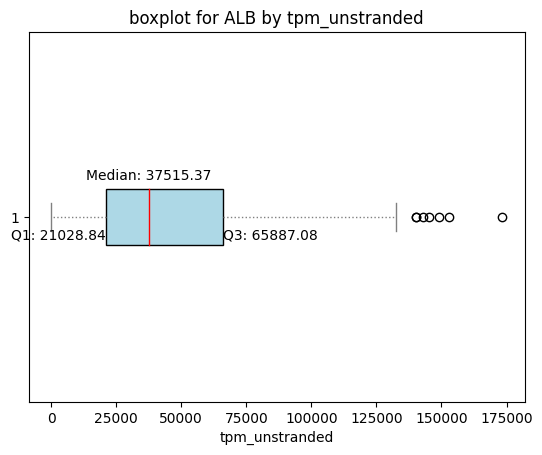

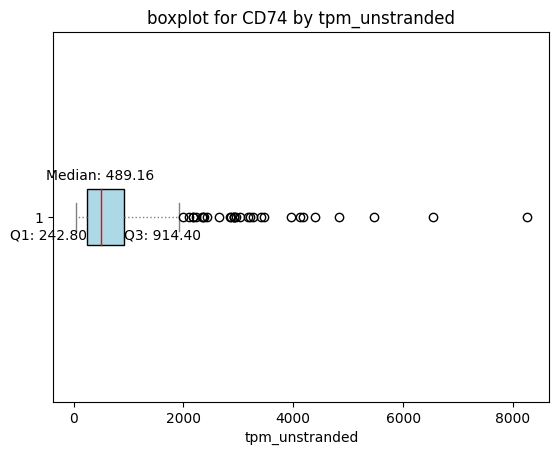

In [21]:

# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
temp = list_per_gene('/home/sam/Desktop/astar/TCGA_map/output_maps')
ALB_arr, CD74_arr = np.array(temp[0]), np.array(temp[1])

# # Creating dataset
# np.random.seed(10)
# data = np.random.normal(100, 20, 200)
# print(data.shape)
 
# fig = plt.figure(figsize =(10, 7))
 
# Creating plot
# plt.title("boxplot for ALB by tpm_unstranded")
# plt.boxplot(ALB_arr)
boxplot_with_labels(ALB_arr, "boxplot for ALB by tpm_unstranded")
 
# # show plot
# plt.show()

# fig = plt.figure(figsize =(10, 7))
# plt.title("boxplot for CD74 by tpm_unstranded")

# # Creating plot
# plt.boxplot(CD74_arr)
 
# # show plot
# plt.show()

boxplot_with_labels(CD74_arr, "boxplot for CD74 by tpm_unstranded")
